# Wrangle and Analyze Data Project ( The tweet archive of Twitter user  'WeRateDogs' )

by Hassan Moharram

Date: February 13, 2019

The goal: wrangle WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations. The Twitter archive is great, but it only contains very basic tweet information. Additional gathering, then assessing and cleaning is required for "Wow!"-worthy analyses and visualizations.

## Table of Contents

- Introduction
- Gather Data
- Assess Data
- Clean Data
- Store, Analyze, and Visualize Data
- Data Insights

## Introduction

The WeRateDogs Twitter archive contains basic tweet data for all 5000+ of their tweets, but not everything. One column the archive does contain though: each tweet's text, which I used to extract rating, dog name, and dog "stage" (i.e. doggo, floofer, pupper, and puppo) to make this Twitter archive "enhanced." Of the 5000+ tweets, I have filtered for tweets with ratings only (there are 2356).

## Gather Data

In [1]:
#Import the required packages

import pandas as pd
import os
import requests
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import time
import numpy as np
import re
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [17]:
# Personal API keys, secrets, and tokens have been replaced with placeholders
# Authentication to twetter API
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

# Construct the API instance
api = tweepy.API(auth_handler=auth,
                 parser = tweepy.parsers.JSONParser(),
                 wait_on_rate_limit=True,
                 wait_on_rate_limit_notify=True)

In [38]:
# Reading the twitter_archive_enhanced.csv file
twitter_archive_enhanced = pd.read_csv('twitter-archive-enhanced.csv')

In [39]:
# getting the values in tweet_id column
tweet_ids = twitter_archive_enhanced.tweet_id.values

In [20]:
# Get the tweet object for the first tweet in twitter archive dataframe(test to make sure the code is right) 
for tweet_id in tweet_ids:
    page = api.get_status(tweet_id, tweet_mode = 'extended')
    print(json.dumps(page, indent = 10))
    break

{
          "created_at": "Tue Aug 01 16:23:56 +0000 2017",
          "id": 892420643555336193,
          "id_str": "892420643555336193",
          "full_text": "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
          "truncated": false,
          "display_text_range": [
                    0,
                    85
          ],
          "entities": {
                    "hashtags": [],
                    "symbols": [],
                    "user_mentions": [],
                    "urls": [],
                    "media": [
                              {
                                        "id": 892420639486877696,
                                        "id_str": "892420639486877696",
                                        "indices": [
                                                  86,
                                                  109
                                        ],
                              

In [21]:
# Get the tweet object for all the tweets in twitter archive dataframe 
df_list = []
error_list = []
start = time.time()
for tweet_id in tweet_ids:
    try:
        page = api.get_status(tweet_id, tweet_mode = 'extended')
               
        favorites = page['favorite_count'] 
        retweets = page['retweet_count']   
        user_followers = page['user']['followers_count']   
        user_favourites = page['user']['favourites_count']
        date_time = page['created_at']     
        
        df_list.append({'tweet_id': int(tweet_id),
                        'favorites': int(favorites),
                        'retweets': int(retweets),
                        'user_followers': int(user_followers),
                        'user_favourites': int(user_favourites),
                        'date_time': pd.to_datetime(date_time)})
        
    except Exception as e:
        print("Error for: " + str(tweet_id)+ " _ " + str(e))
        error_list.append(tweet_id)
end = time.time()        
print(end - start)
    
   

Error for: 888202515573088257 _ [{'code': 144, 'message': 'No status found with that ID.'}]
Error for: 873697596434513921 _ [{'code': 144, 'message': 'No status found with that ID.'}]
Error for: 872668790621863937 _ [{'code': 144, 'message': 'No status found with that ID.'}]
Error for: 869988702071779329 _ [{'code': 144, 'message': 'No status found with that ID.'}]
Error for: 866816280283807744 _ [{'code': 144, 'message': 'No status found with that ID.'}]
Error for: 861769973181624320 _ [{'code': 144, 'message': 'No status found with that ID.'}]
Error for: 845459076796616705 _ [{'code': 144, 'message': 'No status found with that ID.'}]
Error for: 842892208864923648 _ [{'code': 144, 'message': 'No status found with that ID.'}]
Error for: 837012587749474308 _ [{'code': 144, 'message': 'No status found with that ID.'}]
Error for: 827228250799742977 _ [{'code': 144, 'message': 'No status found with that ID.'}]
Error for: 812747805718642688 _ [{'code': 144, 'message': 'No status found with 

Rate limit reached. Sleeping for: 102


Error for: 754011816964026368 _ [{'code': 144, 'message': 'No status found with that ID.'}]
Error for: 680055455951884288 _ [{'code': 144, 'message': 'No status found with that ID.'}]


Rate limit reached. Sleeping for: 187


2240.9612267017365


In [22]:
#tweets errors
error_list

[888202515573088257,
 873697596434513921,
 872668790621863937,
 869988702071779329,
 866816280283807744,
 861769973181624320,
 845459076796616705,
 842892208864923648,
 837012587749474308,
 827228250799742977,
 812747805718642688,
 802247111496568832,
 775096608509886464,
 770743923962707968,
 754011816964026368,
 680055455951884288]

In [23]:
# Repeat the same process for the tweet_ids that have an error exception and couldn't append to the result (df_list)
error_list2 = []
for tweet_id in error_list:
    try:
        
        page = api.get_status(tweet_id, tweet_mode = 'extended')
       
        favorites = page['favorite_count'] 
        retweets = page['retweet_count']   
        user_followers = page['user']['followers_count']   
        user_favourites = page['user']['favourites_count'] 
        date_time = page['created_at']     
        
        df_list.append({'tweet_id': int(tweet_id),
                        'favorites': int(favorites),
                        'retweets': int(retweets),
                        'user_followers': int(user_followers),
                        'user_favourites': int(user_favourites),
                        'date_time': pd.to_datetime(date_time)})
    except Exception as e:
        print("Error for: " + str(tweet_id)+ " _ " + str(e))
        error_list2.append(tweet_id)    
        

Error for: 888202515573088257 _ [{'code': 144, 'message': 'No status found with that ID.'}]
Error for: 873697596434513921 _ [{'code': 144, 'message': 'No status found with that ID.'}]
Error for: 872668790621863937 _ [{'code': 144, 'message': 'No status found with that ID.'}]
Error for: 869988702071779329 _ [{'code': 144, 'message': 'No status found with that ID.'}]
Error for: 866816280283807744 _ [{'code': 144, 'message': 'No status found with that ID.'}]
Error for: 861769973181624320 _ [{'code': 144, 'message': 'No status found with that ID.'}]
Error for: 845459076796616705 _ [{'code': 144, 'message': 'No status found with that ID.'}]
Error for: 842892208864923648 _ [{'code': 144, 'message': 'No status found with that ID.'}]
Error for: 837012587749474308 _ [{'code': 144, 'message': 'No status found with that ID.'}]
Error for: 827228250799742977 _ [{'code': 144, 'message': 'No status found with that ID.'}]
Error for: 812747805718642688 _ [{'code': 144, 'message': 'No status found with 

In [24]:
#succeeded tweets
df_list

[{'tweet_id': 892420643555336193,
  'favorites': 37939,
  'retweets': 8287,
  'user_followers': 7729159,
  'user_favourites': 140963,
  'date_time': Timestamp('2017-08-01 16:23:56')},
 {'tweet_id': 892177421306343426,
  'favorites': 32573,
  'retweets': 6119,
  'user_followers': 7729159,
  'user_favourites': 140963,
  'date_time': Timestamp('2017-08-01 00:17:27')},
 {'tweet_id': 891815181378084864,
  'favorites': 24529,
  'retweets': 4054,
  'user_followers': 7729159,
  'user_favourites': 140963,
  'date_time': Timestamp('2017-07-31 00:18:03')},
 {'tweet_id': 891689557279858688,
  'favorites': 41282,
  'retweets': 8424,
  'user_followers': 7729159,
  'user_favourites': 140963,
  'date_time': Timestamp('2017-07-30 15:58:51')},
 {'tweet_id': 891327558926688256,
  'favorites': 39470,
  'retweets': 9129,
  'user_followers': 7729159,
  'user_favourites': 140963,
  'date_time': Timestamp('2017-07-29 16:00:24')},
 {'tweet_id': 891087950875897856,
  'favorites': 19833,
  'retweets': 3038,
  'u

In [25]:
#new error tweets
error_list2

[888202515573088257,
 873697596434513921,
 872668790621863937,
 869988702071779329,
 866816280283807744,
 861769973181624320,
 845459076796616705,
 842892208864923648,
 837012587749474308,
 827228250799742977,
 812747805718642688,
 802247111496568832,
 775096608509886464,
 770743923962707968,
 754011816964026368,
 680055455951884288]

In [26]:
# Check the length of tweet_id column
len(twitter_archive_enhanced.tweet_id)

2356

In [27]:
# Check the length of the succeeded tweets
len(df_list)

2340

In [28]:
# Check the length of the tweets errors
len(error_list)

16

In [29]:
# Check the length of the new error tweets
len(error_list2)

16

We still have the same error tweet_id, so I will Ignore them.

In [30]:
# Check the duplicated tweet_id rows
twitter_archive_enhanced['tweet_id'].duplicated().sum()

0

In [31]:
# Create DataFrames from the list of dictionaries
tweet_json = pd.DataFrame(df_list, columns = ['tweet_id', 'favorites', 'retweets', 'user_followers', 'user_favourites', 'date_time'])
tweet_json.head()

,tweet_id,favorites,retweets,user_followers,user_favourites,date_time
0,892420643555336193,37939,8287,7729159,140963,2017-08-01 16:23:56
1,892177421306343426,32573,6119,7729159,140963,2017-08-01 00:17:27
2,891815181378084864,24529,4054,7729159,140963,2017-07-31 00:18:03
3,891689557279858688,41282,8424,7729159,140963,2017-07-30 15:58:51
4,891327558926688256,39470,9129,7729159,140963,2017-07-29 16:00:24


In [33]:
# Save the dataFrame in a text file
tweet_json.to_csv('tweet_json.txt', index = False)

In [40]:
# read the dataframe
tweet_json = pd.read_csv('tweet_json.txt')
tweet_json.head()

,tweet_id,favorites,retweets,user_followers,user_favourites,date_time
0,892420643555336193,37939,8287,7729159,140963,2017-08-01 16:23:56
1,892177421306343426,32573,6119,7729159,140963,2017-08-01 00:17:27
2,891815181378084864,24529,4054,7729159,140963,2017-07-31 00:18:03
3,891689557279858688,41282,8424,7729159,140963,2017-07-30 15:58:51
4,891327558926688256,39470,9129,7729159,140963,2017-07-29 16:00:24


In [41]:
# creating a folder called 'image_predictions' 
folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [42]:
# downloading image_predictions.tsv programmatically
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response.content

b"tweet_id\tjpg_url\timg_num\tp1\tp1_conf\tp1_dog\tp2\tp2_conf\tp2_dog\tp3\tp3_conf\tp3_dog\n666020888022790149\thttps://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg\t1\tWelsh_springer_spaniel\t0.465074\tTrue\tcollie\t0.156665\tTrue\tShetland_sheepdog\t0.0614285\tTrue\n666029285002620928\thttps://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg\t1\tredbone\t0.506826\tTrue\tminiature_pinscher\t0.07419169999999999\tTrue\tRhodesian_ridgeback\t0.07201\tTrue\n666033412701032449\thttps://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg\t1\tGerman_shepherd\t0.596461\tTrue\tmalinois\t0.13858399999999998\tTrue\tbloodhound\t0.11619700000000001\tTrue\n666044226329800704\thttps://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg\t1\tRhodesian_ridgeback\t0.408143\tTrue\tredbone\t0.360687\tTrue\tminiature_pinscher\t0.222752\tTrue\n666049248165822465\thttps://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg\t1\tminiature_pinscher\t0.560311\tTrue\tRottweiler\t0.243682\tTrue\tDoberman\t0.154629\tTrue\n666050758794694657\thttps://pbs.twimg.com/

In [43]:
with open(os.path.join(folder_name, url.split('/')[-1]), mode = 'wb') as file:
        file.write(response.content)

In [44]:
os.listdir(folder_name) 

['image-predictions.tsv']

In [45]:
# read the dataframe
image_predictions = pd.read_csv('image-predictions.tsv', sep = '\t')
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


## Assess Data

In [46]:
twitter_archive_enhanced

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [47]:
# getting information about twitter_archive_enhanced dataframe
twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [48]:
#getting rows with not null values in twitter_archive_enhanced dataframe.
twitter_archive_enhanced[twitter_archive_enhanced.retweeted_status_id.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Terrance. He's being yelle...,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397...,11,10,Terrance,None,None,None,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,https://twitter.com/rachel2195/status/87685077...,14,10,None,None,None,pupper,None
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Coco. At first I though...,8.663350e+17,4.196984e+09,2017-05-21 16:48:45 +0000,https://twitter.com/dog_rates/status/866334964...,12,10,Coco,None,None,None,None
95,873697596434513921,NaN,NaN,2017-06-11 00:25:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,None,None,None,None
97,873337748698140672,NaN,NaN,2017-06-10 00:35:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sierra. She's one preci...,8.732138e+17,4.196984e+09,2017-06-09 16:22:42 +0000,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None


In [49]:
# getting duplicated rows in tweed_id column
twitter_archive_enhanced.tweet_id.duplicated().sum()

0

In [50]:
# making a sample of twitter_archive_enhanced dataframe
twitter_archive_enhanced.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1194,717428917016076293,NaN,NaN,2016-04-05 19:09:17 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Skittle. He's trying to communicate. 1...,NaN,NaN,NaN,https://vine.co/v/iIhEU2lVqxz,11,10,Skittle,None,None,None,None
1895,674742531037511680,6.747400e+17,4.196984e+09,2015-12-10 00:08:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Some clarification is required. The dog is sin...,NaN,NaN,NaN,NaN,11,10,None,None,None,None,None
35,885518971528720385,NaN,NaN,2017-07-13 15:19:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I have a new hero and his name is Howard. 14/1...,NaN,NaN,NaN,https://twitter.com/4bonds2carbon/status/88551...,14,10,None,None,None,None,None
393,825876512159186944,NaN,NaN,2017-01-30 01:21:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Mo. No one will push him around in the...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/825876512...,11,10,Mo,None,None,None,None
1385,700747788515020802,NaN,NaN,2016-02-19 18:24:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Pls stop sending in non-can...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/700747788...,11,10,very,None,None,None,None
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392...,12,10,None,None,None,None,None
1953,673662677122719744,NaN,NaN,2015-12-07 00:37:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kendall. 12/10 would cuddle the hell o...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673662677...,12,10,Kendall,None,None,None,None
891,759557299618865152,NaN,NaN,2016-07-31 01:12:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Emma. She can't believe her last guess...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/759557299...,10,10,Emma,None,None,None,None
930,754449512966619136,NaN,NaN,2016-07-16 22:55:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Dex. He can see into your past and fut...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/754449512...,11,10,Dex,None,None,None,None
1534,689993469801164801,NaN,NaN,2016-01-21 02:10:37 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Here we are witnessing a rare High Stepping Al...,NaN,NaN,NaN,https://vine.co/v/ienexVMZgi5,12,10,None,None,floofer,None,None


In [51]:
# getting the null values in name column
twitter_archive_enhanced.name.isnull().sum()

0

In [52]:
# getting the 'None' names in name column
(twitter_archive_enhanced.name == 'None').sum()

745

In [53]:
# getting the null values in expanded_urls column
twitter_archive_enhanced.expanded_urls.isnull().sum()

59

In [54]:
# getting the 'None' values in expanded_urls column
sum(twitter_archive_enhanced.expanded_urls == 'None')

0

In [55]:
# getting the str values in source coulmn which start with "<a"
twitter_archive_enhanced[twitter_archive_enhanced["source"].str.startswith("<a")].shape

(2356, 17)

In [56]:
# getting the str values in text coulmn which start with "RT @dog_rates: 
twitter_archive_enhanced[twitter_archive_enhanced["text"].str.startswith("RT @dog_rates: ")].head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Terrance. He's being yelle...,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397...,11,10,Terrance,None,None,None,None


In [57]:
twitter_archive_enhanced.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [58]:
tweet_json

,tweet_id,favorites,retweets,user_followers,user_favourites,date_time
0,892420643555336193,37939,8287,7729159,140963,2017-08-01 16:23:56
1,892177421306343426,32573,6119,7729159,140963,2017-08-01 00:17:27
2,891815181378084864,24529,4054,7729159,140963,2017-07-31 00:18:03
3,891689557279858688,41282,8424,7729159,140963,2017-07-30 15:58:51
4,891327558926688256,39470,9129,7729159,140963,2017-07-29 16:00:24
5,891087950875897856,19833,3038,7729159,140963,2017-07-29 00:08:17
6,890971913173991426,11598,2010,7729159,140963,2017-07-28 16:27:12
7,890729181411237888,64012,18383,7729159,140963,2017-07-28 00:22:40
8,890609185150312448,27240,4175,7729159,140963,2017-07-27 16:25:51
9,890240255349198849,31264,7190,7729159,140963,2017-07-26 15:59:51


In [59]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 6 columns):
tweet_id           2340 non-null int64
favorites          2340 non-null int64
retweets           2340 non-null int64
user_followers     2340 non-null int64
user_favourites    2340 non-null int64
date_time          2340 non-null object
dtypes: int64(5), object(1)
memory usage: 109.8+ KB


In [60]:
# getting the duplicated rows in tweet_id column
tweet_json.tweet_id.duplicated().sum()

0

In [61]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [62]:
#getting information about image_predictions dataframe
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [63]:
# getting the duplicated rows in tweet_id column
image_predictions.tweet_id.duplicated().sum()

0

In [64]:
# getting the duplicated rows in jpg_url column
image_predictions.jpg_url.duplicated().sum()

66

In [65]:
# making a sample of image_predictions dataframe
image_predictions.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1542,791312159183634433,https://pbs.twimg.com/media/CvtONV4WAAAQ3Rn.jpg,4,miniature_pinscher,0.892925,True,toy_terrier,0.095524,True,Doberman,0.003544,True
1713,818614493328580609,https://pbs.twimg.com/media/C1xNgraVIAA3EVb.jpg,4,Chihuahua,0.450722,True,Border_terrier,0.204177,True,beagle,0.092774,True
586,679047485189439488,https://pbs.twimg.com/media/CWx2FaLWcAEQ3vh.jpg,1,panpipe,0.962572,False,bannister,0.025248,False,golden_retriever,0.002930,True
1309,754011816964026368,https://pbs.twimg.com/media/CnbJuPoXEAAjcVF.jpg,1,French_bulldog,0.600985,True,Boston_bull,0.273176,True,boxer,0.056772,True
83,667495797102141441,https://pbs.twimg.com/media/CUNr4-7UwAAg2lq.jpg,1,Chihuahua,0.143957,True,Christmas_stocking,0.118651,False,ski_mask,0.092482,False
201,669682095984410625,https://pbs.twimg.com/media/CUswUBRUAAAahAo.jpg,1,Christmas_stocking,0.188397,False,studio_couch,0.086887,False,bookcase,0.082599,False
1984,872122724285648897,https://pbs.twimg.com/media/DBpm-5UXcAUeCru.jpg,1,basketball,0.808396,False,pug,0.066736,True,dalmatian,0.054570,True
746,687664829264453632,https://pbs.twimg.com/media/CYsTg1XUsAEPjxE.jpg,1,pug,0.957365,True,French_bulldog,0.038559,True,toy_poodle,0.000667,True
980,707315916783140866,https://pbs.twimg.com/media/CdDkEkHWwAAAeUJ.jpg,2,Bernese_mountain_dog,0.979235,True,Shetland_sheepdog,0.011037,True,Appenzeller,0.003971,True
1751,824297048279236611,https://pbs.twimg.com/media/C3B9ypNWEAM1bVs.jpg,2,teddy,0.588230,False,jigsaw_puzzle,0.028910,False,doormat,0.022251,False


In [66]:
# getting all coulmns in twitter_archive_enhanced, tweet_json, and image_predictions dataframes
all_columns = pd.Series(list(twitter_archive_enhanced)+list(tweet_json)+list(image_predictions))
# # getting duplicated coulmns in twitter_archive_enhanced, tweet_json, and image_predictions dataframes
all_columns[all_columns.duplicated()]

17    tweet_id
23    tweet_id
dtype: object

In [67]:
twitter_archive_enhanced.name.value_counts()

None              745
a                  55
Charlie            12
Lucy               11
Cooper             11
Oliver             11
Lola               10
Penny              10
Tucker             10
Winston             9
Bo                  9
the                 8
Sadie               8
an                  7
Toby                7
Daisy               7
Buddy               7
Bailey              7
Jax                 6
Scout               6
Bella               6
Jack                6
Koda                6
Stanley             6
Rusty               6
Milo                6
Dave                6
Leo                 6
Oscar               6
very                5
                 ... 
Tilly               1
Gabby               1
Mark                1
Philippe            1
Clarkus             1
Cheesy              1
Hall                1
BeBe                1
Nida                1
Kellogg             1
Rupert              1
Evy                 1
Michelangelope      1
Snicku              1
Ed        

### Quality

#### `twitter_archive_enhanced` table:
- There are some not null values in 'retweeted_status_id', 'retweeted_status_user_id', and 'retweeted_status_timestamp' columns.
- There is no need for columns like:'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', and 'retweeted_status_timestamp'.
- 'name' column should be changed to a more suitable name.
- Erroneous data types(in_reply_to_status_id ,in_reply_to_user_id, timestamp, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, and 'source')
- Missing values in (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls)
- some values in (text) starting with 'RT @dog_rates: ' not the main text content.
- Null values in 'doggo', 'floofer', 'pupper', and 'puppo' are represented in None instead of NaN.
- Null values in 'name' are represented in None instead of NaN.
- Lowercase and uppercase given 'name'.
- Invalid names values in 'name' like; None, a, an, the,his,and my.

#### `tweet_json` table:
- Total number or tweet_id are 2340 instead of 2356.

#### `image_predictions` table:
- p1,p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, and p3_dog should be represented into 2 columns; 'dog_breed' and 'confidence_level'.
- Total number or tweet_id are 2075 instead of 2356.
- There are 66 duplicated 'jpg_url'.
- Lowercase and uppercase given 'p1', 'p2', and 'p3'.
- Erroneous data types('p1', 'p2',and 'p3')




- timestamp' and 'date_time' in `twitter_archive_enhanced` and `tweet_json` tables repectively, have the same values, but are with diffenrent names.

### Tidiness

- `twitter_archive_enhanced` table: 'doggo', 'floofer', 'pupper', and 'puppo' columns should be represented into one column 'dogtionary'.
- All the three tables should be represented in one whole table.


## Clean Data

In [94]:
# getting a copy of each dataframe
twitter_archive_enhanced_clean =  twitter_archive_enhanced.copy()
tweet_json_clean = tweet_json.copy()
image_predictions_clean = image_predictions.copy()

### Quality

##### There are some not null values in 'retweeted_status_id', 'retweeted_status_user_id', and 'retweeted_status_timestamp' columns.

##### Define
Drop rows with those not null values.

##### Code

In [95]:
# getting the not null values indexes 
not_null_indexes = twitter_archive_enhanced_clean[twitter_archive_enhanced_clean.retweeted_status_id.notnull()].index

In [96]:
# getting the not null values indexes 
twitter_archive_enhanced_clean[twitter_archive_enhanced_clean.retweeted_status_user_id.notnull()].index

Int64Index([  19,   32,   36,   68,   73,   74,   78,   91,   95,   97,
            ...
             926,  937,  943,  949, 1012, 1023, 1043, 1242, 2259, 2260],
           dtype='int64', length=181)

In [97]:
# getting the not null values indexes 
twitter_archive_enhanced_clean[twitter_archive_enhanced_clean.retweeted_status_timestamp.notnull()].index

Int64Index([  19,   32,   36,   68,   73,   74,   78,   91,   95,   97,
            ...
             926,  937,  943,  949, 1012, 1023, 1043, 1242, 2259, 2260],
           dtype='int64', length=181)

In [98]:
# checking if the two columns have the same row indexes
(twitter_archive_enhanced_clean[twitter_archive_enhanced_clean.retweeted_status_id.notnull()].index == twitter_archive_enhanced_clean[twitter_archive_enhanced_clean.retweeted_status_user_id.notnull()].index).sum()

181

In [99]:
# checking if the two columns have the same row indexes
(twitter_archive_enhanced_clean[twitter_archive_enhanced_clean.retweeted_status_user_id.notnull()].index == twitter_archive_enhanced_clean[twitter_archive_enhanced_clean.retweeted_status_timestamp.notnull()].index).sum()

181

In [100]:
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean.drop(not_null_indexes , axis = 0)

##### Test

In [102]:
twitter_archive_enhanced_clean[twitter_archive_enhanced_clean.retweeted_status_timestamp.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Quality

##### `twitter_archive_enhanced` table: there is no need for columns like: 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'etweeted_status_user_id',  and 'retweeted_status_timestamp'

##### Define
Drop 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', and 'retweeted_status_timestamp'

#### Code

In [103]:
drop_columns = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean.drop(drop_columns, axis = 1)
twitter_archive_enhanced_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#### Test

In [104]:
twitter_archive_enhanced_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Tidiness


###### `twitter_archive_enhanced` table: 'doggo', 'floofer', 'pupper', and 'puppo' columns should be represented into one column 'dogtionary'.


#### Define
Replace 'None' values in 'doggo', 'floofer', 'pupper', 'puppo' columns with ''. Then thum up those 4 columns into one column called 'dogtionary'. Then drop them. Then replace '' values in 'dogtionary'

In [105]:
# replacing the 'None' values in 'doggo', 'floofer', 'pupper', 'puppo' columns with ''
dog_stages = ['doggo', 'floofer', 'pupper', 'puppo']
for stage in dog_stages:
    twitter_archive_enhanced_clean[stage] = twitter_archive_enhanced_clean[stage].replace('None', '')

In [106]:
# adding the values in 'doggo', 'floofer', 'pupper', 'puppo' columns together
twitter_archive_enhanced_clean['dogtionary'] = twitter_archive_enhanced_clean.apply(lambda x: x['doggo'] + x['floofer']+ x['pupper']+ x['puppo'], axis=1)    

In [107]:
# dropping 'doggo', 'floofer', 'pupper', 'puppo' columns
drop_columns = ['doggo', 'floofer', 'pupper', 'puppo']
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean.drop(drop_columns, axis = 1)

In [108]:
# replacing '' values with NaN
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean.replace('', np.nan)

#### Test

In [109]:
twitter_archive_enhanced_clean.sample(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dogtionary
763,778027034220126208,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,pupper
1515,690989312272396288,2016-01-23 20:07:44 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",We've got a doggy down. Requesting backup. 12/...,https://vine.co/v/iOZKZEU2nHq,12,10,None,NaN
757,778624900596654080,2016-09-21 16:00:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Penny. She's a sailor pup. 11/10 would...,https://twitter.com/dog_rates/status/778624900...,11,10,Penny,NaN
532,808001312164028416,2016-12-11 17:31:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cooper. He likes to stick his tongue o...,https://twitter.com/dog_rates/status/808001312...,12,10,Cooper,NaN
1481,693280720173801472,2016-01-30 03:52:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sadie and her 2 pups Shebang &amp; Ruf...,https://twitter.com/dog_rates/status/693280720...,10,10,Sadie,NaN
1144,727286334147182592,2016-05-02 23:59:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I swear to god if we get sent another Blue Mad...,https://twitter.com/dog_rates/status/727286334...,9,10,None,NaN
1097,736225175608430592,2016-05-27 15:58:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Please stop sending in non-...,https://twitter.com/dog_rates/status/736225175...,10,10,very,NaN
1685,681654059175129088,2015-12-29 01:52:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Toffee. He's a happy pupper. Appears d...,https://twitter.com/dog_rates/status/681654059...,12,10,Toffee,pupper
771,776813020089548800,2016-09-16 16:00:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Solomon. He was arrested for possession o...,https://twitter.com/dog_rates/status/776813020...,12,10,Solomon,NaN
730,781661882474196992,2016-09-30 01:08:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Who keeps sending in pictures without dogs in ...,https://twitter.com/dog_rates/status/781661882...,5,10,None,NaN


### Quality

##### `image_predictions` table: p1 ,p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, and p3_dog should be represented into 2 columns; 'dog_breed' and 'confidence_level'.

#### Define
Construct the following for loop through each row in `image_predictions_clean` table and creating 2 lists; dog_breed and confidence_level, Then adding them to `image_predictions_clean` table as 2 columns. Then dropping 'p1' ,'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog' columns.

#### Code

In [110]:
# emty listes
dog_breed  = []
confidence_level = []

for index, row in image_predictions_clean.iterrows():
    if row['p1_dog'] == True:
        dog_breed.append(row['p1']) 
        confidence_level.append(row['p1_conf'])
    elif row['p2_dog'] == True and row['p1_dog'] == False and row['p3_dog'] == False:
        dog_breed.append(row['p2']) 
        confidence_level.append(row['p2_conf'])
    elif row['p3_dog'] == True and row['p1_dog'] == False and row['p2_dog'] == False:
        dog_breed.append(row['p3']) 
        confidence_level.append(row['p3_conf']) 
    else:
        dog_breed.append('NaN') 
        confidence_level.append('0')

In [111]:
image_predictions_clean['dog_breed'] = dog_breed
image_predictions_clean['confidence_level'] = confidence_level

In [112]:
# dropping 'p1' ,'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog' columns
drop_columns = ['p1' ,'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog']
image_predictions_clean = image_predictions_clean.drop(drop_columns, axis = 1)

#### Test

In [113]:
image_predictions_clean.head()

,tweet_id,jpg_url,img_num,dog_breed,confidence_level
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311


### Tidiness

###### All the three tables should be represented in one whole table.

#### Define
Merge the `twitter_archive_enhanced_clean` table to the `tweet_json_clean` table, joining ontweet_id. Then Merge the resulting `twitter_archive_enhanced_clean` table to the `image_predictions_clean` table, joining ontweet_id.

#### Code

In [114]:
twitter_archive_enhanced_clean = pd.merge(twitter_archive_enhanced_clean, tweet_json_clean, 
                                         on = ['tweet_id'], how = 'left')
twitter_archive_enhanced_clean = pd.merge(twitter_archive_enhanced_clean, image_predictions_clean,
                                         on = ['tweet_id'], how = 'left')

#### Test

In [115]:
twitter_archive_enhanced_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dogtionary,favorites,retweets,user_followers,user_favourites,date_time,jpg_url,img_num,dog_breed,confidence_level
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,37939.0,8287.0,7729159.0,140963.0,2017-08-01 16:23:56,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,NaN,0
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,32573.0,6119.0,7729159.0,140963.0,2017-08-01 00:17:27,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,24529.0,4054.0,7729159.0,140963.0,2017-07-31 00:18:03,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,41282.0,8424.0,7729159.0,140963.0,2017-07-30 15:58:51,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,Labrador_retriever,0.168086
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,39470.0,9129.0,7729159.0,140963.0,2017-07-29 16:00:24,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712


### Quality

##### 'timestamp' and 'date_time' in `twitter_archive_enhanced` and `tweet_json` tables repectively, have the same values, but are with diffenrent names.

#### Define
Drop 'date_time' column.

#### Code

In [116]:
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean.drop('date_time', axis = 1)

#### Test

In [117]:
twitter_archive_enhanced_clean

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dogtionary,favorites,retweets,user_followers,user_favourites,jpg_url,img_num,dog_breed,confidence_level
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,37939.0,8287.0,7729159.0,140963.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,NaN,0
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,32573.0,6119.0,7729159.0,140963.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,24529.0,4054.0,7729159.0,140963.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,41282.0,8424.0,7729159.0,140963.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,Labrador_retriever,0.168086
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,39470.0,9129.0,7729159.0,140963.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712
5,891087950875897856,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,NaN,19833.0,3038.0,7729159.0,140963.0,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1.0,Chesapeake_Bay_retriever,0.425595
6,890971913173991426,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,NaN,11598.0,2010.0,7729159.0,140963.0,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1.0,Appenzeller,0.341703
7,890729181411237888,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,NaN,64012.0,18383.0,7729159.0,140963.0,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2.0,Pomeranian,0.566142
8,890609185150312448,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,NaN,27240.0,4175.0,7729159.0,140963.0,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1.0,Irish_terrier,0.487574
9,890240255349198849,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,31264.0,7190.0,7729159.0,140963.0,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1.0,Pembroke,0.511319


### Quality

##### 'name' column should be changed to a more suitable name.

#### Define
Change the name of 'name' column to dog_name

#### Code

In [118]:
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean.rename(columns={'name': 'dog_name'})

#### Test

In [119]:
twitter_archive_enhanced_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,dog_name,dogtionary,favorites,retweets,user_followers,user_favourites,jpg_url,img_num,dog_breed,confidence_level
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,37939.0,8287.0,7729159.0,140963.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,NaN,0
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,32573.0,6119.0,7729159.0,140963.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,24529.0,4054.0,7729159.0,140963.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,41282.0,8424.0,7729159.0,140963.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,Labrador_retriever,0.168086
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,39470.0,9129.0,7729159.0,140963.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712


### Quality

In [120]:
twitter_archive_enhanced_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2042
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       31
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [121]:
twitter_archive_enhanced_clean.dogtionary.value_counts()

pupper          224
doggo            75
puppo            24
doggopupper      10
floofer           9
doggofloofer      1
doggopuppo        1
Name: dogtionary, dtype: int64

In [122]:
twitter_archive_enhanced_clean.dog_breed.value_counts()

NaN                               403
golden_retriever                  150
Labrador_retriever                102
Pembroke                           90
Chihuahua                          85
pug                                61
chow                               46
toy_poodle                         45
Pomeranian                         41
Samoyed                            41
malamute                           32
cocker_spaniel                     29
French_bulldog                     29
Chesapeake_Bay_retriever           27
miniature_pinscher                 22
Eskimo_dog                         21
Staffordshire_bullterrier          21
beagle                             20
Siberian_husky                     20
German_shepherd                    20
Shetland_sheepdog                  19
Cardigan                           19
Maltese_dog                        19
Rottweiler                         18
Shih-Tzu                           18
kuvasz                             17
Lakeland_ter

##### Erroneous data types('source', 'dogtionary', 'dog_breed', and 'timestamp')

#### Define
Convert 'source', 'dogtionary', and 'dog_breed' to categorical data type and 'timestamp' to datetime data type.

#### Code

In [123]:
twitter_archive_enhanced_clean.source = twitter_archive_enhanced_clean.source.astype('category')
twitter_archive_enhanced_clean.dogtionary = twitter_archive_enhanced_clean.dogtionary.astype('category')
twitter_archive_enhanced_clean.dog_breed = twitter_archive_enhanced_clean.dog_breed.astype('category')
twitter_archive_enhanced_clean.timestamp = pd.to_datetime(twitter_archive_enhanced_clean.timestamp )

#### Test

In [124]:
twitter_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 17 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null datetime64[ns]
source                2175 non-null category
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
dog_name              2175 non-null object
dogtionary            344 non-null category
favorites             2173 non-null float64
retweets              2173 non-null float64
user_followers        2173 non-null float64
user_favourites       2173 non-null float64
jpg_url               1994 non-null object
img_num               1994 non-null float64
dog_breed             1994 non-null category
confidence_level      1994 non-null object
dtypes: category(3), datetime64[ns](1), float64(5), int64(3), object(5)
memory usage: 267.7+ KB


In [125]:
twitter_archive_enhanced_clean.expanded_urls.isnull().sum()

58

##### Erroneous data types(in_reply_to_status_id ,in_reply_to_user_id, timestamp, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, and source)

#### Define
I already dropped in_reply_to_status_id ,in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp columns. timestamp and source columns are already converted to the right data types in the previous step.

##### Too much missing values in (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp)

#### Define
I already dropped these columns previously, so there is no need for them now.

##### Some values in (text) starting with 'RT @dog_rates: ' not the main text content.

#### Define
Check each taxt starts with 'RT @dog_rates: ' and replace that with ''. Then append all modified texts to a list called text_modified. Then drop the text column. Then add the text_modified list as a column to twitter_archive_enhanced_clean.

#### Code

In [126]:
text_modified = []

def new_text(df):
    if df['text'].startswith('RT @dog_rates: '):
        df['text'] = df['text'].replace('RT @dog_rates: ', '')
        text_modified.append(df['text'])
    else:
        text_modified.append(df['text'])

        
twitter_archive_enhanced_clean.apply(new_text, axis = 1)        

0       None
1       None
2       None
3       None
4       None
5       None
6       None
7       None
8       None
9       None
10      None
11      None
12      None
13      None
14      None
15      None
16      None
17      None
18      None
19      None
20      None
21      None
22      None
23      None
24      None
25      None
26      None
27      None
28      None
29      None
        ... 
2145    None
2146    None
2147    None
2148    None
2149    None
2150    None
2151    None
2152    None
2153    None
2154    None
2155    None
2156    None
2157    None
2158    None
2159    None
2160    None
2161    None
2162    None
2163    None
2164    None
2165    None
2166    None
2167    None
2168    None
2169    None
2170    None
2171    None
2172    None
2173    None
2174    None
Length: 2175, dtype: object

In [127]:
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean.drop('text', axis = 1)

In [128]:
twitter_archive_enhanced_clean['text'] = text_modified

#### Test

In [129]:
twitter_archive_enhanced_clean.text.str.startswith('RT @dog_rates: ').sum()

0

##### Null values in 'doggo', 'floofer', 'pupper', and 'puppo' are represented in None instead of NaN.

#### Define
I already solved this problem

##### Null values in 'name' are represented in None instead of NaN.

#### Define
Replace all 'None' values in dog_name column with 'NaN'

#### Code

In [130]:
twitter_archive_enhanced_clean.dog_name = twitter_archive_enhanced_clean.dog_name.replace('None', np.nan)

#### Test

In [131]:
sum(twitter_archive_enhanced_clean.dog_name == 'None')

0

In [132]:
sum(twitter_archive_enhanced_clean.dog_name.isnull())

680

##### Lowercase and uppercase given 'name'.

#### Define
Make all names in dog_name column lowercase.

#### Code

In [133]:
twitter_archive_enhanced_clean.dog_name = twitter_archive_enhanced_clean.dog_name.str.lower()

#### Test

In [134]:
twitter_archive_enhanced_clean.dog_name.str.isupper().sum()

0

In [135]:
sum(twitter_archive_enhanced_clean.dog_name.isnull())

680

##### Invalid names values in 'name' like; None, a, an, the,his,and my.

#### Define
Remove all the invalid names and replace them with the right ones.

#### Code

In [136]:
# empty list
dog_name_modified = []

#function
def modify(df):
        if df['text'].startswith('This is ') and re.match(r'[A-Z].*', df['text'].split()[2]):
            # check each value in text column which starts with ('This is ') and the following word starts with capital letter
            dog_name_modified.append(df['text'].split()[2].strip(',').strip('.'))
            # append that value to dog_name_modified
        elif df['text'].startswith('Meet ') and re.match(r'[A-Z].*', df['text'].split()[1]):
            # check each value in text column which starts with ('Meet ') and the following word starts with capital letter
            dog_name_modified.append(df['text'].split()[1].strip(',').strip('.'))
            # append that value to dog_name_modified
        elif df['text'].startswith('Say hello to ') and re.match(r'[A-Z].*', df['text'].split()[3]):
            # check each value in text column which starts with ('Say hello to ') and the following word starts with capital letter
            dog_name_modified.append(df['text'].split()[3].strip(',').strip('.'))
            # append that value to dog_name_modified
        elif df['text'].startswith('Here we have ') and re.match(r'[A-Z].*', df['text'].split()[3]):
            # check each value in text column which starts with ('Here we have ') and the following word starts with capital letter
            dog_name_modified.append(df['text'].split()[3].strip(',').strip('.'))
            # append that value to dog_name_modified
        elif 'named' in df['text'] and re.match(r'[A-Z].*', df['text'].split()[df['text'].split().index('named') + 1]):
            ## check each value in text column which contains with ('named') and the following word starts with capital letter
            dog_name_modified.append(df['text'].split()[df['text'].split().index('named') + 1].strip(',').strip('.'))
            # append that value to dog_name_modified
        else:
            # append 'NaN' to dog_name_modified
            dog_name_modified.append('NaN')
            
#apply the modify function to twitter_archive_enhanced_clean dataframe            
twitter_archive_enhanced_clean.apply(modify, axis=1)

0       None
1       None
2       None
3       None
4       None
5       None
6       None
7       None
8       None
9       None
10      None
11      None
12      None
13      None
14      None
15      None
16      None
17      None
18      None
19      None
20      None
21      None
22      None
23      None
24      None
25      None
26      None
27      None
28      None
29      None
        ... 
2145    None
2146    None
2147    None
2148    None
2149    None
2150    None
2151    None
2152    None
2153    None
2154    None
2155    None
2156    None
2157    None
2158    None
2159    None
2160    None
2161    None
2162    None
2163    None
2164    None
2165    None
2166    None
2167    None
2168    None
2169    None
2170    None
2171    None
2172    None
2173    None
2174    None
Length: 2175, dtype: object

In [137]:
# dropping dog_name column
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean.drop('dog_name', axis = 1)

In [138]:
twitter_archive_enhanced_clean['dog_name'] = dog_name_modified

#### Test

In [139]:
twitter_archive_enhanced_clean

,tweet_id,timestamp,source,expanded_urls,rating_numerator,rating_denominator,dogtionary,favorites,retweets,user_followers,user_favourites,jpg_url,img_num,dog_breed,confidence_level,text,dog_name
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/892420643...,13,10,NaN,37939.0,8287.0,7729159.0,140963.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,NaN,0,This is Phineas. He's a mystical boy. Only eve...,Phineas
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/892177421...,13,10,NaN,32573.0,6119.0,7729159.0,140963.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,This is Tilly. She's just checking pup on you....,Tilly
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/891815181...,12,10,NaN,24529.0,4054.0,7729159.0,140963.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,This is Archie. He is a rare Norwegian Pouncin...,Archie
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/891689557...,13,10,NaN,41282.0,8424.0,7729159.0,140963.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,Labrador_retriever,0.168086,This is Darla. She commenced a snooze mid meal...,Darla
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/891327558...,12,10,NaN,39470.0,9129.0,7729159.0,140963.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,This is Franklin. He would like you to stop ca...,Franklin
5,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/891087950...,13,10,NaN,19833.0,3038.0,7729159.0,140963.0,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1.0,Chesapeake_Bay_retriever,0.425595,Here we have a majestic great white breaching ...,NaN
6,890971913173991426,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...","https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,NaN,11598.0,2010.0,7729159.0,140963.0,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1.0,Appenzeller,0.341703,Meet Jax. He enjoys ice cream so much he gets ...,Jax
7,890729181411237888,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/890729181...,13,10,NaN,64012.0,18383.0,7729159.0,140963.0,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2.0,Pomeranian,0.566142,When you watch your owner call another dog a g...,NaN
8,890609185150312448,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/890609185...,13,10,NaN,27240.0,4175.0,7729159.0,140963.0,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1.0,Irish_terrier,0.487574,This is Zoey. She doesn't want to be one of th...,Zoey
9,890240255349198849,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/890240255...,14,10,doggo,31264.0,7190.0,7729159.0,140963.0,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1.0,Pembroke,0.511319,This is Cassie. She is a college pup. Studying...,Cassie


In [140]:
# getting the names in dog_name columns which starts with 'a'
(twitter_archive_enhanced_clean.dog_name =='a').sum()

0

##### Total number or tweet_id are 2340 instead of 2356 in `tweet_json` table

#### Define
This was already solved earlier by merging `tweet_json` table with `twitter_archive_enhanced_clean` table.

##### Total number or tweet_id are 2075 instead of 2356 in `image_predictions` table

#### Define
This was already solved earlier by merging `image_predictions` table with `twitter_archive_enhanced_clean` table.

##### Lowercase and uppercase given 'p1', 'p2', and 'p3'.

#### Define
This was already solved earlier.

##### Erroneous data types('p1', 'p2',and 'p3')

#### Define
This was already solved earlier.

## Store, Analyze, and Visualize Data

### Store Data

In [141]:
twitter_archive_enhanced_clean.to_csv('twitter_archive_master.csv', index=False)

In [142]:
twitter_archive_master = pd.read_csv("twitter_archive_master.csv")

In [143]:
twitter_archive_master.head()

,tweet_id,timestamp,source,expanded_urls,rating_numerator,rating_denominator,dogtionary,favorites,retweets,user_followers,user_favourites,jpg_url,img_num,dog_breed,confidence_level,text,dog_name
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/892420643...,13,10,NaN,37939.0,8287.0,7729159.0,140963.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,NaN,0.000000,This is Phineas. He's a mystical boy. Only eve...,Phineas
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/892177421...,13,10,NaN,32573.0,6119.0,7729159.0,140963.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,This is Tilly. She's just checking pup on you....,Tilly
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/891815181...,12,10,NaN,24529.0,4054.0,7729159.0,140963.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,This is Archie. He is a rare Norwegian Pouncin...,Archie
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/891689557...,13,10,NaN,41282.0,8424.0,7729159.0,140963.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,Labrador_retriever,0.168086,This is Darla. She commenced a snooze mid meal...,Darla
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/891327558...,12,10,NaN,39470.0,9129.0,7729159.0,140963.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,This is Franklin. He would like you to stop ca...,Franklin


### Analyze and Visualize Data

In [144]:
list(twitter_archive_master)

['tweet_id',
 'timestamp',
 'source',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'dogtionary',
 'favorites',
 'retweets',
 'user_followers',
 'user_favourites',
 'jpg_url',
 'img_num',
 'dog_breed',
 'confidence_level',
 'text',
 'dog_name']

In [145]:
twitter_archive_master.dogtionary.value_counts()

pupper          224
doggo            75
puppo            24
doggopupper      10
floofer           9
doggofloofer      1
doggopuppo        1
Name: dogtionary, dtype: int64

##### What is most successful or common dog stage(dogtionary) in the WeRateDogs Twitter archive ?

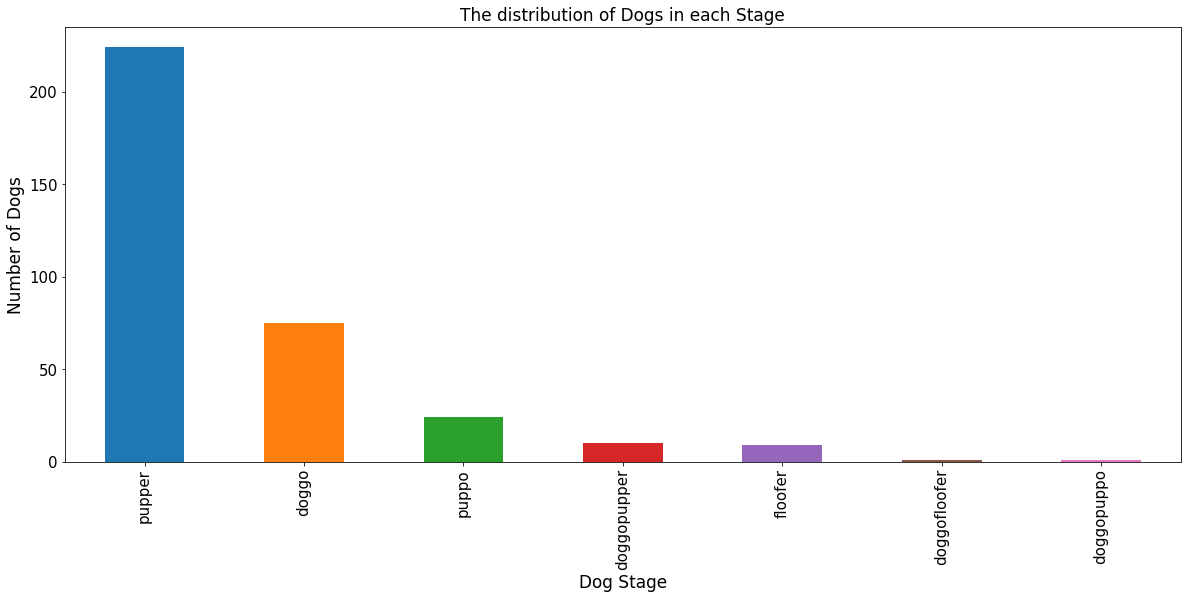

In [146]:
ind = twitter_archive_master['dogtionary'].value_counts().index
twitter_archive_master['dogtionary'].value_counts()[ind].plot(kind = 'bar', figsize = (20,8), fontsize = 15)
plt.xlabel('Dog Stage', fontsize = 17)
plt.ylabel('Number of Dogs',  fontsize = 17)
plt.title('The distribution of Dogs in each Stage', fontsize = 17);

In [147]:
twitter_archive_master.dog_breed.value_counts()

golden_retriever                  150
Labrador_retriever                102
Pembroke                           90
Chihuahua                          85
pug                                61
chow                               46
toy_poodle                         45
Samoyed                            41
Pomeranian                         41
malamute                           32
cocker_spaniel                     29
French_bulldog                     29
Chesapeake_Bay_retriever           27
miniature_pinscher                 22
Eskimo_dog                         21
Staffordshire_bullterrier          21
German_shepherd                    20
beagle                             20
Siberian_husky                     20
Cardigan                           19
Maltese_dog                        19
Shetland_sheepdog                  19
Shih-Tzu                           18
Rottweiler                         18
Lakeland_terrier                   17
kuvasz                             17
Italian_grey

In [148]:
dog_breed_modified = twitter_archive_master.groupby('dog_breed').filter(lambda x: len(x) >= 20 and len(x) <= 200)

##### What is most successful or common dog breed in the WeRateDogs Twitter archive ?

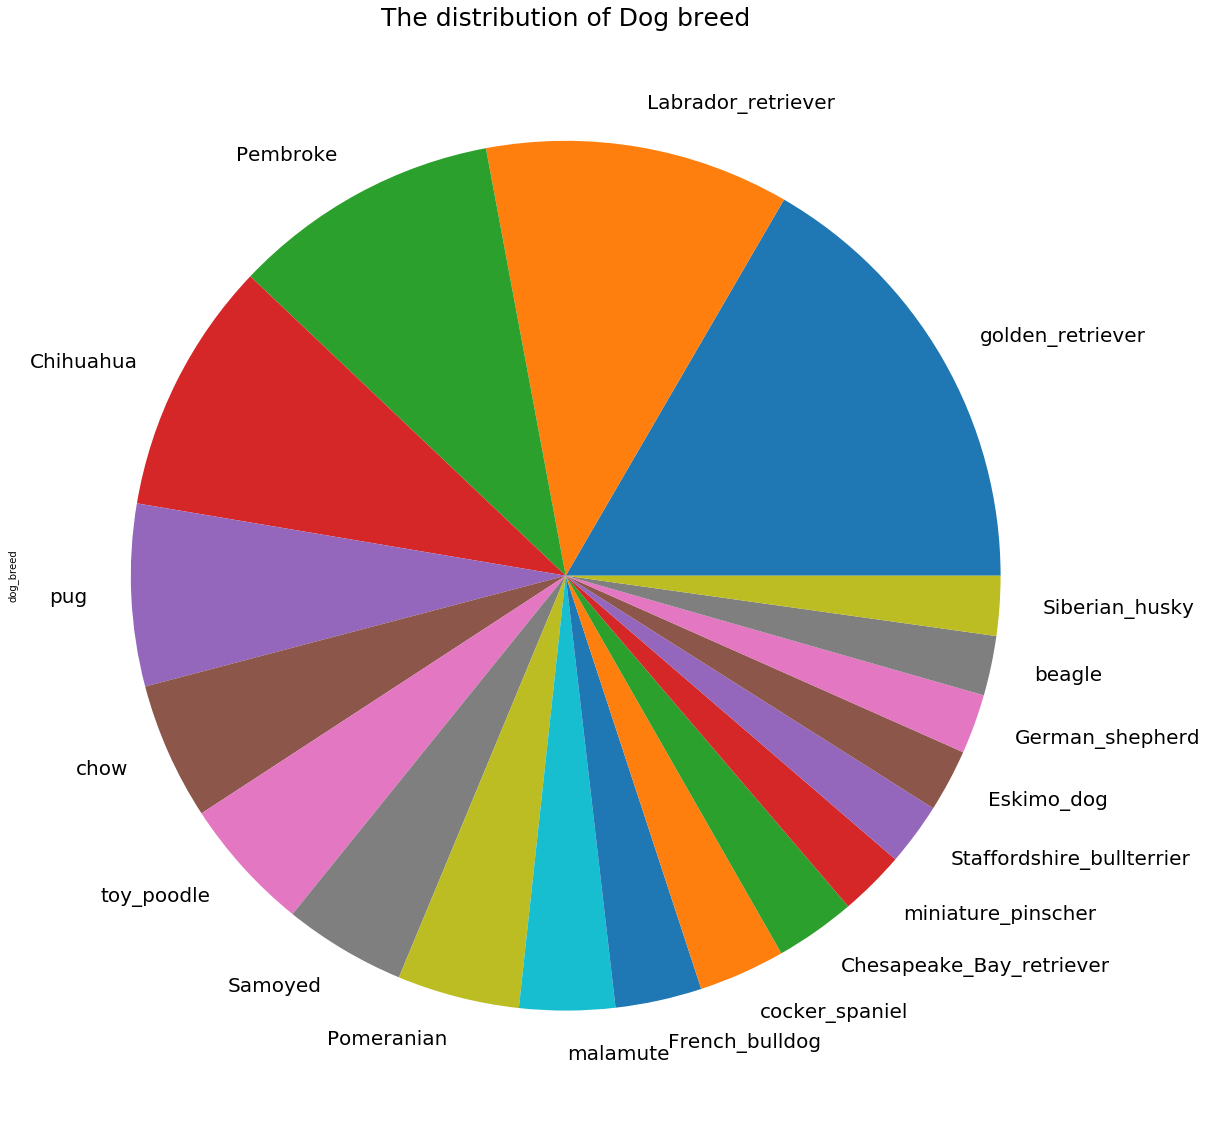

In [149]:
ind = dog_breed_modified['dog_breed'].value_counts().index
dog_breed_modified['dog_breed'].value_counts()[ind].plot(kind = 'pie', figsize = (20, 20), fontsize=20)
plt.title('The distribution of Dog breed', fontsize=25);

##### What is confidence level vs number of dog images in predicting the dog breed in the WeRateDogs Twitter archive ?

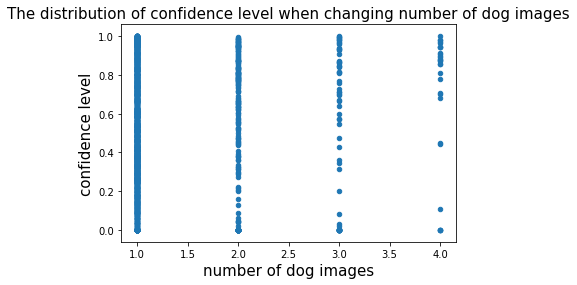

In [150]:
twitter_archive_master.plot(x='img_num', y='confidence_level', kind='scatter')
plt.xlabel('number of dog images', fontsize = 15)
plt.ylabel('confidence level', fontsize = 15)
plt.title('The distribution of confidence level when changing number of dog images', fontsize = 15);

##### What is dog rating vs number of retweets in the WeRateDogs Twitter archive ?

In [151]:
twitter_archive_master_modified = twitter_archive_master.groupby('rating_numerator').filter(lambda x: len(x) >= 10 and len(x) <= 1000)

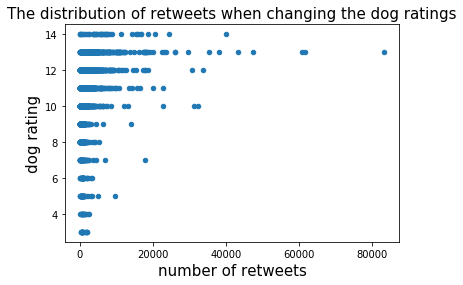

In [152]:
twitter_archive_master_modified.plot(x='retweets', y='rating_numerator', kind='scatter')
plt.xlabel('number of retweets', fontsize = 15)
plt.ylabel('dog rating', fontsize = 15)
plt.title('The distribution of retweets when changing the dog ratings', fontsize = 15);

### Data Insights

From the first visualization, 'Pupper' is most successful or common dog stage(dogtionary) in the WeRateDogs Twitter archive.

From the second visualization, 'Golden Retriever' is most successful or common dog breed in the WeRateDogs Twitter archive.

From the third visualization, the confidence level of predicting the god breed is decreasing when increasing the number of dog images. Given 1 god image, has the most confidence level.

From the fourth visualization, the number of retweets increase when increasing the dog rating.